In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
# Load the dataset
data1 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv", encoding='latin1')
data2 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv", encoding='latin1')
data3 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv", encoding='latin1')
data4 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", encoding='latin1')
data5 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", encoding='latin1')
data6 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv", encoding='latin1')
data7 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", encoding='latin1')
data8 = pd.read_csv("/home/wahba/Documents/cicid/cicids2017/original/csv/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", encoding='latin1')

In [3]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

for data in data_list:
    print(data.shape)

(529918, 79)
(445909, 79)
(692703, 79)
(170366, 79)
(288602, 79)
(191033, 79)
(286467, 79)
(225745, 79)


In [4]:
# Merge datasets
data = pd.concat(data_list, ignore_index=True)
print("Merged data shape:", data.shape)

# Remove dataframes to free up memory
for d in data_list: del d

Merged data shape: (2830743, 79)


In [5]:
# Remove whitespaces from column names
data.columns = data.columns.str.strip()
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

# 1.0 Dataset Cleaning

## 1.1 Handling duplicate values

### 1.1.1 Removing duplicate rows

In [7]:
# Duplicate rows
duplicates = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicates))
data = data.drop_duplicates()
del duplicates

Number of duplicate rows: 308381


### 1.1.2 Removing duplicate columns

In [8]:
# Duplicate columns
# Identify columns with identical data
identical_columns = {}
columns = data.columns
list_control = columns.copy().tolist()

# Compare each pair of columns
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            if data[col1].equals(data[col2]):
                if (col1 not in identical_columns) and (col1 in list_control):
                    identical_columns[col1] = [col2]
                    list_control.remove(col2)
                elif (col1 in identical_columns) and (col1 in list_control):
                    identical_columns[col1].append(col2)
                    list_control.remove(col2)

# Print the result
if identical_columns:
    print("Identical columns found:")
    for key, value in identical_columns.items():
        print(f"'{key}' is identical to {value}")
else: print("No identical columns found.")

for key, value in identical_columns.items():
    data.drop(columns=value, inplace=True)

Identical columns found:
'Total Fwd Packets' is identical to ['Subflow Fwd Packets']
'Total Backward Packets' is identical to ['Subflow Bwd Packets']
'Fwd PSH Flags' is identical to ['SYN Flag Count']
'Bwd PSH Flags' is identical to ['Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
'Fwd URG Flags' is identical to ['CWE Flag Count']
'Fwd Header Length' is identical to ['Fwd Header Length.1']


## 1.2 Handling columns with no variance (only one unique value)

In [9]:
# Check for numeric columns that contain only a single unique value, indicating no diversity in values.
# Such columns contribute no useful information to the analysis and may be candidates for removal.
only_unique_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        only_unique_cols.append(col)
        print(col)

print(f'\nThe number of columns with only one unique values is: {len(only_unique_cols)}')

data.drop(only_unique_cols, axis=1, inplace=True)
del only_unique_cols

Bwd PSH Flags

The number of columns with only one unique values is: 1


## 1.3 Handling missing and infinity values

In [10]:
# Identify missing values
missing_values = data.isnull().sum() # Check for missing values in each column
print("Missing values in each column:\n", missing_values[missing_values > 0]) # Display only columns with missing values

# Identify infinity values
numeric_columns = data.select_dtypes(include=[np.number]).columns
infinity_counts = (data[numeric_columns] == np.inf).sum()
print("Infinity values in each numeric column:\n", infinity_counts[infinity_counts > 0]) # Display only columns with infinity values

# Remove rows with missing values
data.dropna(inplace=True)
# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)


Missing values in each column:
 Flow Bytes/s    353
dtype: int64
Infinity values in each numeric column:
 Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [12]:
## 1.4 Handling label with very low instance

In [13]:
attack_counts = data['Label'].value_counts()
percentages = attack_counts / attack_counts.sum()
# Prepare table
table = pd.DataFrame({
    'Count': data['Label'].value_counts(),
    'Percentage (%)': percentages
})

print(table)

                                Count  Percentage (%)
Label                                                
BENIGN                        2096134        0.831137
DoS Hulk                       172846        0.068535
DDoS                           128016        0.050760
PortScan                        90819        0.036011
DoS GoldenEye                   10286        0.004078
FTP-Patator                      5933        0.002352
DoS slowloris                    5385        0.002135
DoS Slowhttptest                 5228        0.002073
SSH-Patator                      3219        0.001276
Bot                              1953        0.000774
Web Attack ï¿½ Brute Force       1470        0.000583
Web Attack ï¿½ XSS                652        0.000259
Infiltration                       36        0.000014
Web Attack ï¿½ Sql Injection       21        0.000008
Heartbleed                         11        0.000004


In [14]:
data.drop(data[data['Label'] == 'Infiltration'].index, inplace=True)
data.drop(data[data['Label'] == 'Heartbleed'].index, inplace=True)

## 1.5 Remove Destination Port column

# 2.0 Columns correlation analysis

###  Correlation heatmap

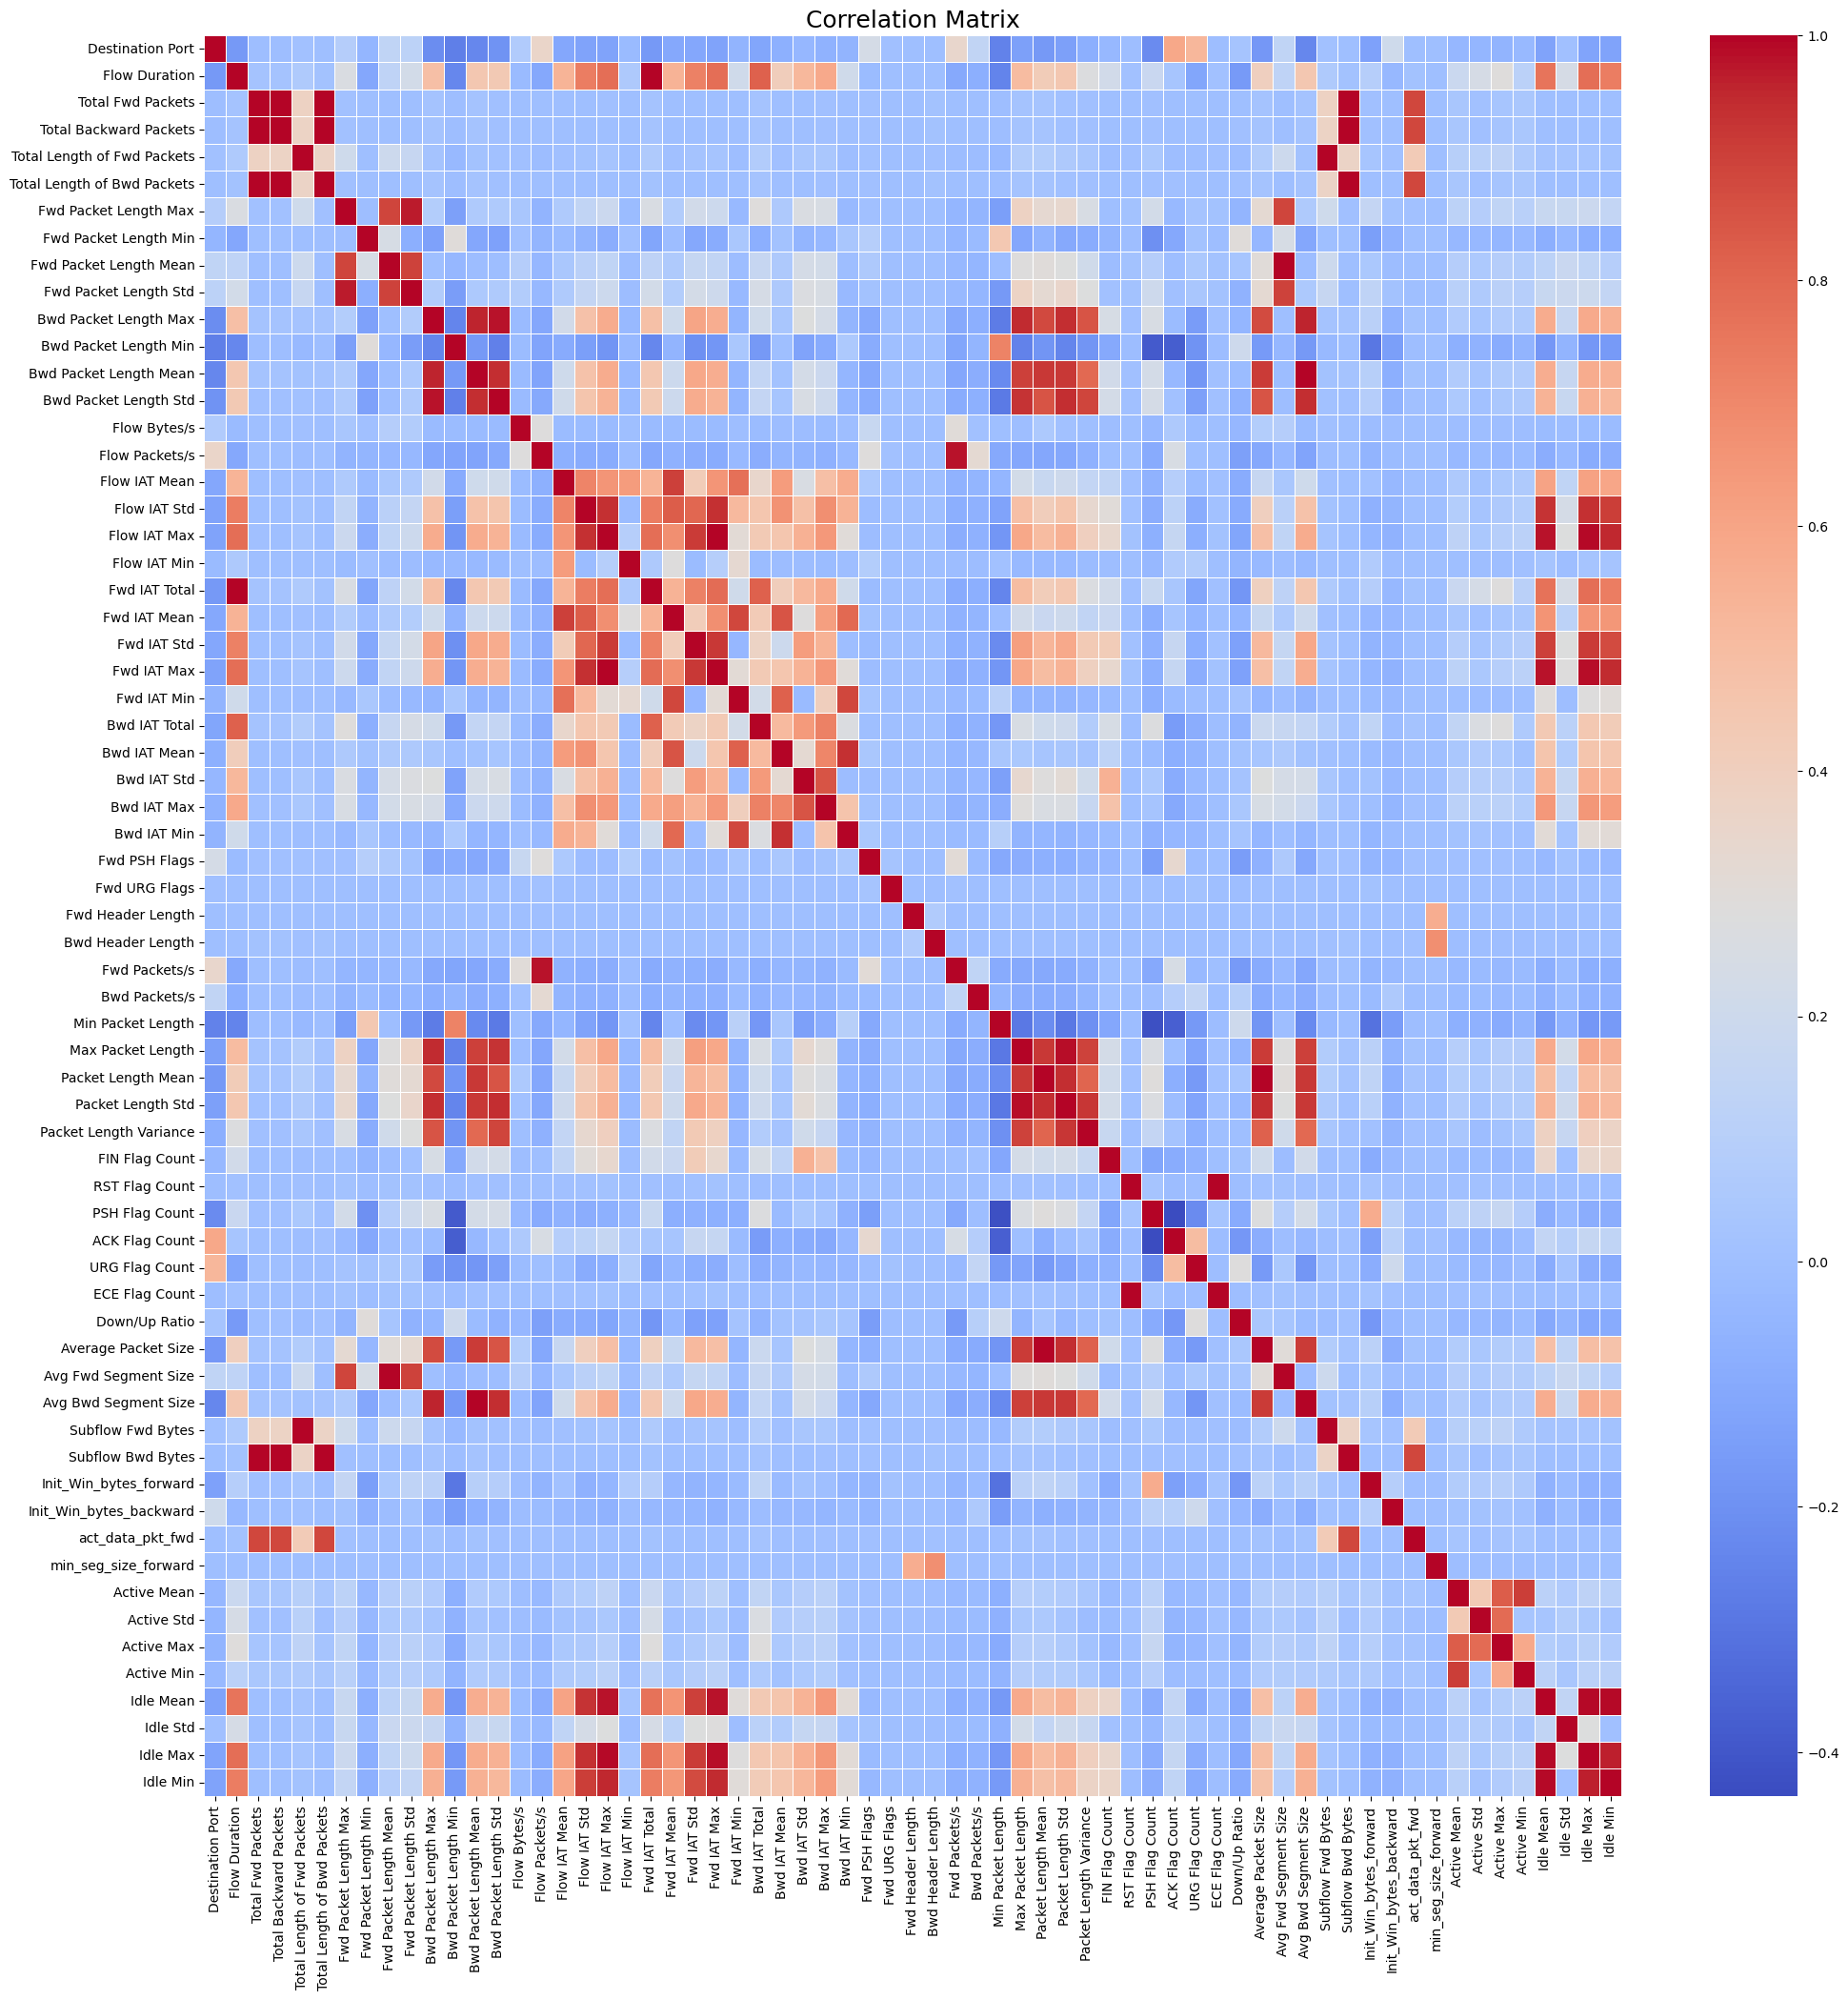

In [15]:
correlation = data.corr(numeric_only=True)

correlation.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(correlation, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()
     

In [16]:
# Printing the pairs with high correlation and isolating the near/perfect multicollinearity
high_multicollinearity = []

high_corr = np.where(np.abs(correlation) > 0.85)
high_corr = [(correlation.index[x], correlation.columns[y], correlation.iloc[x, y])
                for x, y in zip(*high_corr) if x != y and x < y]

for item in high_corr:
    print(f'{item[0]} has a high correlation with {item[1]}: {item[2].round(4)}')
    if item[2] >= 0.95:
        high_multicollinearity.append(item)

Flow Duration has a high correlation with Fwd IAT Total: 0.9985
Total Fwd Packets has a high correlation with Total Backward Packets: 0.9991
Total Fwd Packets has a high correlation with Total Length of Bwd Packets: 0.997
Total Fwd Packets has a high correlation with Subflow Bwd Bytes: 0.997
Total Fwd Packets has a high correlation with act_data_pkt_fwd: 0.8874
Total Backward Packets has a high correlation with Total Length of Bwd Packets: 0.9945
Total Backward Packets has a high correlation with Subflow Bwd Bytes: 0.9944
Total Backward Packets has a high correlation with act_data_pkt_fwd: 0.8826
Total Length of Fwd Packets has a high correlation with Subflow Fwd Bytes: 1.0
Total Length of Bwd Packets has a high correlation with Subflow Bwd Bytes: 1.0
Total Length of Bwd Packets has a high correlation with act_data_pkt_fwd: 0.884
Fwd Packet Length Max has a high correlation with Fwd Packet Length Mean: 0.889
Fwd Packet Length Max has a high correlation with Fwd Packet Length Std: 0.968

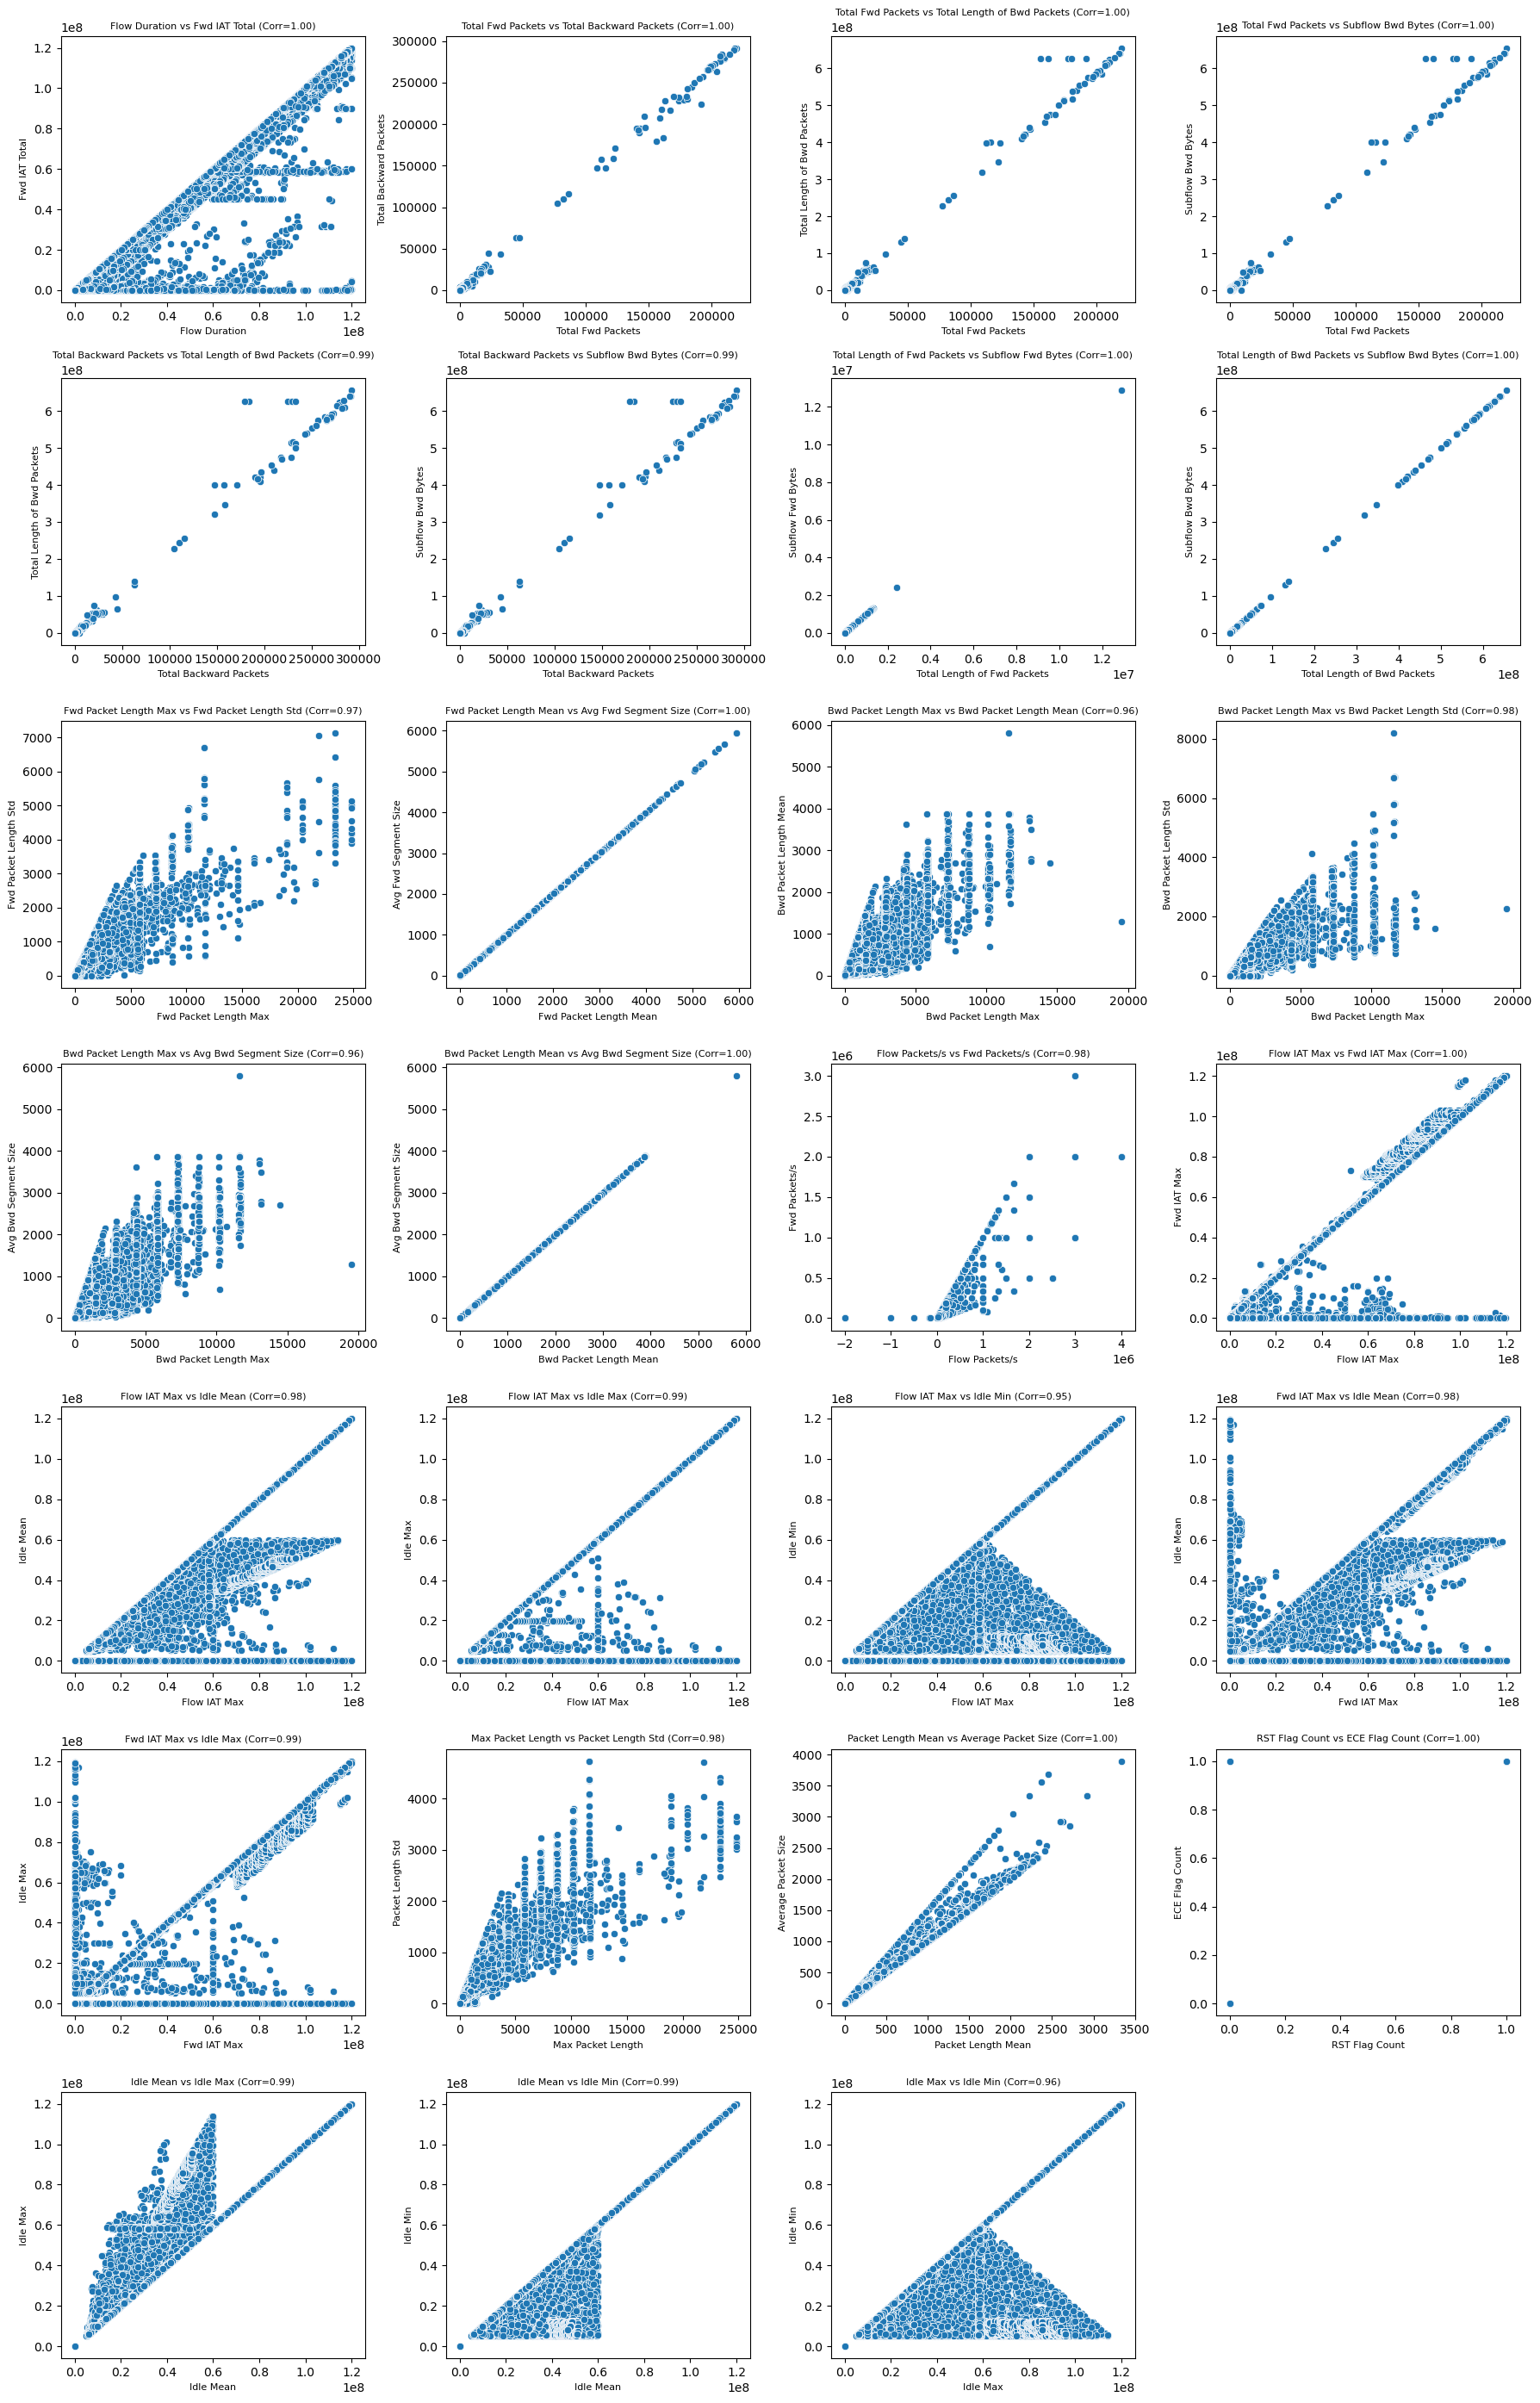

In [17]:
# Plotting the pairs with very high correlation for better visualization

n_plots = len(high_multicollinearity)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, item in enumerate(high_multicollinearity):
    feature_x = item[0]
    feature_y = item[1]
    corr_value = item[2]

    # Scatter plot
    sns.scatterplot(x=data[feature_x], y=data[feature_y], ax=axes[i])
    axes[i].set_title(f'{feature_x} vs {feature_y} (Corr={corr_value:.2f})', fontsize=8)
    axes[i].set_xlabel(feature_x, fontsize=8)
    axes[i].set_ylabel(feature_y, fontsize=8)

# Hide any unused subplots
for j in range(len(high_multicollinearity), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
# Removal of columns based on correlation analysis
selected_columns = ['Total Backward Packets', 'Total Length of Bwd Packets', 'Subflow Bwd Bytes', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size']

# dropping columns with perfect/near perfect multicollinearity
data.drop(columns=selected_columns, inplace=True)

# 3.0 Renaming and Grouping Label 

In [19]:
# Exploring data
data['Label'].value_counts()

Label
BENIGN                          2096134
DoS Hulk                         172846
DDoS                             128016
PortScan                          90819
DoS GoldenEye                     10286
FTP-Patator                        5933
DoS slowloris                      5385
DoS Slowhttptest                   5228
SSH-Patator                        3219
Bot                                1953
Web Attack ï¿½ Brute Force         1470
Web Attack ï¿½ XSS                  652
Web Attack ï¿½ Sql Injection         21
Name: count, dtype: int64

In [20]:
# Remap label to attack types
attack_mapping = {
    'BENIGN': 'BENIGN',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'PortScan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Web Attack ï¿½ Brute Force': 'Web Attack',
    'Web Attack ï¿½ XSS': 'Web Attack',
    'Web Attack ï¿½ Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Bot': 'Bot',
    'PortScan': 'Port Scan',
    'Heartbleed': 'Heartbleed'
}
data['Label'] = data['Label'].map(attack_mapping)
data['Label'].value_counts()


Label
BENIGN         2096134
DoS             193745
DDoS            128016
Port Scan        90819
Brute Force       9152
Web Attack        2143
Bot               1953
Name: count, dtype: int64

# Save cleaned data

In [21]:
print(data.shape)
print(data['Label'].value_counts())

(2521962, 61)
Label
BENIGN         2096134
DoS             193745
DDoS            128016
Port Scan        90819
Brute Force       9152
Web Attack        2143
Bot               1953
Name: count, dtype: int64


In [22]:
# Clean dataset to a CSV file
data.to_csv('/home/wahba/Documents/nids5/test/dataset/cicids2017_data_preprocessing2.csv', index=False)